In [1]:
import os
import sys


%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from utils import get_time_period, get_all_score
IF_LOG = True

In [2]:
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, RationalQuadratic

##Totally Random:

In [6]:
me = 4.3904183267
va = 0.793628715368
get_all_score(np.random.normal(me, va, (1000,14)), np.random.normal(me, va, (1000,14)))

0.28503727834332254

##randomly select 80% shop as training set and use remaining 20% as test data. select shops that as no `NA` between 
2016-08-01 and 2016-10-31. predict last 14 days in October:

In [15]:
sales = get_time_period(start="2016-08-01", end="2016-10-31", log2=IF_LOG)
predit_days = 14
sales_X = sales.ix[-3*predit_days:-predit_days]
sales_Y = sales.ix[-predit_days:]
pct = 0.8

In [8]:
X = sales_X.values.transpose()
X.shape

(1549, 28)

In [9]:
Y = sales_Y.values.transpose()
Y.shape

(1549, 14)

In [10]:

train_label = np.random.choice(Y.shape[0], int(Y.shape[0]*pct))
test_label = np.array([i for i in range(Y.shape[0]) if i not in train_label])

train_X = X[train_label,:]
train_Y = Y[train_label,:]

test_X = X[test_label,:]
test_Y = Y[test_label,:]



##DecisionTreeRegressor:

In [11]:
regr_all = DecisionTreeRegressor(max_depth=8)
regr_all.fit(train_X, train_Y)
pred_Y = regr_all.predict(test_X)
get_all_score(pred_Y, test_Y, log2=IF_LOG)

0.10630703374961083

##RandomForestRegressor:

In [12]:
regr_cv = RandomForestRegressor(max_depth=8)
regr_cv.fit(train_X, train_Y)
pred_Y = regr_cv.predict(test_X)
get_all_score(pred_Y, test_Y, log2=IF_LOG)

0.086365753639473714

In [13]:
def test_train_score(test_X, test_Y, train_X, train_Y, depth_range=range(2,21)):
    train_score= []
    test_score = []
    for depth in depth_range:
        regr_cv = RandomForestRegressor(max_depth=depth)
        regr_cv.fit(train_X, train_Y)
        pred_train_Y = regr_cv.predict(train_X)
        train_score.append(get_all_score(pred_train_Y, train_Y, log2=IF_LOG))
        pred_test_Y = regr_cv.predict(test_X)
        test_score.append(get_all_score(pred_test_Y, test_Y, log2=IF_LOG))
    return train_score, test_score

In [14]:
depth_range = range(2,31)
train_score, test_score = test_train_score(test_X, test_Y, train_X, train_Y, depth_range)

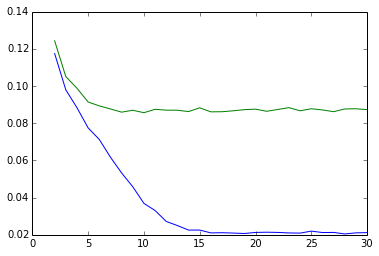

In [15]:
plt.plot(depth_range, train_score)
plt.plot(depth_range, test_score)

In [16]:
min(test_score)

0.085651390239091102

##KNeighborsRegressor:

In [17]:
regr_cv = KNeighborsRegressor()
regr_cv.fit(train_X, train_Y)
pred_Y = regr_cv.predict(test_X)
get_all_score(pred_Y, test_Y, log2=IF_LOG)

0.091324358759430804

In [18]:
def test_train_score(test_X, test_Y, train_X, train_Y, knn_range=range(2,21)):
    train_score= []
    test_score = []
    for depth in depth_range:
        regr_cv = KNeighborsRegressor(n_neighbors=depth)
        regr_cv.fit(train_X, train_Y)
        pred_train_Y = regr_cv.predict(train_X)
        train_score.append(get_all_score(pred_train_Y, train_Y, log2=IF_LOG))
        pred_test_Y = regr_cv.predict(test_X)
        test_score.append(get_all_score(pred_test_Y, test_Y, log2=IF_LOG))
    return train_score, test_score

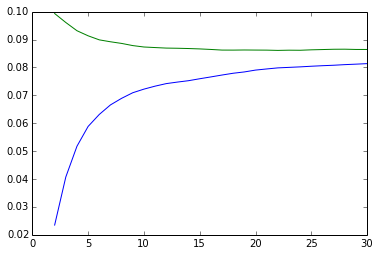

In [19]:
depth_range = range(2,31)
train_score, test_score = test_train_score(test_X, test_Y, train_X, train_Y, depth_range)
plt.plot(depth_range, train_score)
plt.plot(depth_range, test_score)

In [20]:
min(test_score)

0.086093978669791404

##GaussianProcessRegressor with different kernels:

In [21]:
kernel = 1.0 * RBF() \
    + WhiteKernel()
regr_cv = GaussianProcessRegressor(kernel=kernel)
regr_cv.fit(train_X, train_Y)
pred_Y = regr_cv.predict(test_X)
get_all_score(pred_Y, test_Y, log2=IF_LOG)

0.077609786986236801

In [22]:
 kernel = 1.0 * RationalQuadratic() \
    + WhiteKernel()
regr_cv = GaussianProcessRegressor(kernel=kernel)
regr_cv.fit(train_X, train_Y)
pred_Y = regr_cv.predict(test_X)
get_all_score(pred_Y, test_Y, log2=IF_LOG)

0.079398485995211529

In [25]:
sales.shape

(92, 1549)

In [9]:
from baseline_func import generate_ran_train_test

tr_X, tr_Y, te_X, te_Y = generate_ran_train_test(dataset_num=1000)

In [10]:
tr_X.shape

(800, 28)

In [11]:
regr_cv = RandomForestRegressor(max_depth=10)
regr_cv.fit(tr_X, tr_Y)
pred_Y = regr_cv.predict(te_X)
get_all_score(pred_Y, te_Y, log2=IF_LOG)

0.15444948352332244

In [12]:
regr_cv = KNeighborsRegressor(n_neighbors=10)
regr_cv.fit(tr_X, tr_Y)
pred_Y = regr_cv.predict(te_X)
get_all_score(pred_Y, te_Y, log2=IF_LOG)

0.15460250692268587

In [13]:
kernel = 1.0 * RBF() \
    + WhiteKernel()
regr_cv = GaussianProcessRegressor(kernel=kernel)
regr_cv.fit(tr_X, tr_Y)
pred_Y = regr_cv.predict(te_X)
get_all_score(pred_Y, te_Y, log2=IF_LOG)

0.1676281080694044

In [17]:
sales[[2]]

,4
date,
2016-08-01,6.321928
2016-08-02,6.169925
2016-08-03,6.629357
2016-08-04,6.285402
2016-08-05,6.727920
2016-08-06,7.383704
2016-08-07,7.531381
2016-08-08,6.781360
2016-08-09,6.554589
